# Read in the survey datasets into two dataframes

In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")

# Define the path to the Excel workbook
excel_path = r"C:\Users\aajanaku\OneDrive - Above the Treeline, Inc\Desktop\homework\project 4\Plan A Task ML_final.xlsx"

# Read the Excel workbook into a dictionary of data frames
dfs = pd.read_excel(excel_path, sheet_name=None)

# Access the Department of Labor and Department of Commerce worksheets
dol_df = dfs["Department of Labor"]
doc_df = dfs["Department of Commerce"]

# Now you can work with dol_df and doc_df as your data frames
# For example, you can print the first few rows of each data frame
print("Department of Labor Data Frame:")
print(dol_df.head())

print("Department of Commerce Data Frame:")
print(doc_df.head())


Department of Labor Data Frame:
       RandomID agency   Q1   Q2   Q3   Q4   Q5   Q6   Q7 Q8  ...  DRNO  \
0  114016000000     DL  4.0  3.0  5.0  5.0  4.0  4.0  5.0  4  ...     B   
1  137377000000     DL  2.0  2.0  5.0  4.0  4.0  2.0  5.0  2  ...     B   
2  131212000000     DL  5.0  4.0  4.0  4.0  2.0  4.0  5.0  5  ...     B   
3  193260000000     DL  4.0  1.0  2.0  4.0  2.0  2.0  4.0  2  ...     B   
4  197278000000     DL  3.0  4.0  3.0  4.0  3.0  3.0  3.0  3  ...     B   

   DHISP  DDIS DAGEGRP  DSUPER  DFEDTEN  DSEX  DMIL  DLEAVING    POSTWT  
0      B     B       B       B        B     A     B         A  1.430425  
1      B     B       B       A        B     B     B         A  1.712627  
2      B     A       B       A        A     A     A         A  1.532551  
3      B     B       A       A        A     B     A         C  2.302167  
4      A     B       A       A        A     A     B         C  2.918573  

[5 rows x 116 columns]
Department of Commerce Data Frame:
       RandomI

In [4]:
dol_df = dfs["Department of Labor"]
dol_df

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,114016000000,DL,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4,...,B,B,B,B,B,B,A,B,A,1.430425
1,137377000000,DL,2.0,2.0,5.0,4.0,4.0,2.0,5.0,2,...,B,B,B,B,A,B,B,B,A,1.712627
2,131212000000,DL,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5,...,B,B,A,B,A,A,A,A,A,1.532551
3,193260000000,DL,4.0,1.0,2.0,4.0,2.0,2.0,4.0,2,...,B,B,B,A,A,A,B,A,C,2.302167
4,197278000000,DL,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3,...,B,A,B,A,A,A,A,B,C,2.918573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,105014000000,DL,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,...,A,B,B,A,A,A,A,B,A,1.659817
7546,189629000000,DL,4.0,4.0,3.0,4.0,4.0,2.0,3.0,2,...,C,B,B,A,A,A,B,B,D,1.464702
7547,125973000000,DL,4.0,4.0,4.0,4.0,4.0,4.0,4.0,X,...,C,B,B,A,A,A,B,B,A,1.464702
7548,164714000000,DL,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,...,B,B,B,A,A,A,B,B,A,1.435365


# Remove columns not indicated in codebook and demographics worksheets

In [5]:
# Replace the column names if needed
columns_to_keep = ['Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q84', 'Q55', 'Q56', 'Q57', 'Q59', 'Q60', 'Q71', 'Q72', 'Q46', 'Q48', 'Q49', 'Q50','Q52']

# Columns to remove
columns_to_remove = ['POSTWT', 'RandomID', 'agency'] + [col for col in dol_df.columns if col.startswith('Q') and col not in columns_to_keep]

# Drop the unwanted columns
dol_df = dol_df.drop(columns=columns_to_remove)
dol_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q89,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING
0,3.0,5.0,5.0,4.0,5.0,3,4.0,3.0,3.0,2.0,...,4.0,B,B,B,B,B,B,A,B,A
1,2.0,5.0,4.0,2.0,5.0,1,1.0,2.0,1.0,2.0,...,5.0,B,B,B,B,A,B,B,B,A
2,4.0,4.0,4.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,4.0,B,B,A,B,A,A,A,A,A
3,1.0,2.0,4.0,2.0,4.0,2,1.0,1.0,1.0,1.0,...,5.0,B,B,B,A,A,A,B,A,C
4,4.0,3.0,4.0,3.0,3.0,4,3.0,5.0,5.0,5.0,...,3.0,B,A,B,A,A,A,A,B,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5.0,A,B,B,A,A,A,A,B,A
7546,4.0,3.0,4.0,2.0,3.0,4,4.0,4.0,3.0,2.0,...,5.0,C,B,B,A,A,A,B,B,D
7547,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,5.0,...,4.0,C,B,B,A,A,A,B,B,A
7548,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4.0,B,B,B,A,A,A,B,B,A


In [6]:
# Drop rows where DLEAVING is null and replace with 'B'
dol_df['DLEAVING'].fillna('B', inplace=True)
dol_df
# Drop rows where 'DLEAVING' is not in ['A', 'B', 'C', 'D']
dol_df = dol_df.loc[dol_df['DLEAVING'].isin(['A', 'B', 'C', 'D'])]
dol_df 

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q89,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING
0,3.0,5.0,5.0,4.0,5.0,3,4.0,3.0,3.0,2.0,...,4.0,B,B,B,B,B,B,A,B,A
1,2.0,5.0,4.0,2.0,5.0,1,1.0,2.0,1.0,2.0,...,5.0,B,B,B,B,A,B,B,B,A
2,4.0,4.0,4.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,4.0,B,B,A,B,A,A,A,A,A
3,1.0,2.0,4.0,2.0,4.0,2,1.0,1.0,1.0,1.0,...,5.0,B,B,B,A,A,A,B,A,C
4,4.0,3.0,4.0,3.0,3.0,4,3.0,5.0,5.0,5.0,...,3.0,B,A,B,A,A,A,A,B,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5.0,A,B,B,A,A,A,A,B,A
7546,4.0,3.0,4.0,2.0,3.0,4,4.0,4.0,3.0,2.0,...,5.0,C,B,B,A,A,A,B,B,D
7547,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,5.0,...,4.0,C,B,B,A,A,A,B,B,A
7548,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4.0,B,B,B,A,A,A,B,B,A


# Drop rows where missingness above 20% cutpoint

In [7]:
# Calculate row-wise percentage of missing values
row_percent_missing = dol_df.isnull().mean(axis=1)

# Specify the cutpoint
cutpoint = 0.2

# Drop rows with missingness above the cutpoint
dol_df = dol_df.loc[row_percent_missing < cutpoint]
dol_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q89,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING
0,3.0,5.0,5.0,4.0,5.0,3,4.0,3.0,3.0,2.0,...,4.0,B,B,B,B,B,B,A,B,A
1,2.0,5.0,4.0,2.0,5.0,1,1.0,2.0,1.0,2.0,...,5.0,B,B,B,B,A,B,B,B,A
2,4.0,4.0,4.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,4.0,B,B,A,B,A,A,A,A,A
3,1.0,2.0,4.0,2.0,4.0,2,1.0,1.0,1.0,1.0,...,5.0,B,B,B,A,A,A,B,A,C
4,4.0,3.0,4.0,3.0,3.0,4,3.0,5.0,5.0,5.0,...,3.0,B,A,B,A,A,A,A,B,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5.0,A,B,B,A,A,A,A,B,A
7546,4.0,3.0,4.0,2.0,3.0,4,4.0,4.0,3.0,2.0,...,5.0,C,B,B,A,A,A,B,B,D
7547,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,5.0,...,4.0,C,B,B,A,A,A,B,B,A
7548,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4.0,B,B,B,A,A,A,B,B,A


# Check if variables are missing for more than 10% of their values

In [8]:
#Decide whether you want to drop DRNO. If you retain consider running the models with and without those variables.
# Calculate the percentage of missing values for each column
column_percent_missing = dol_df.isnull().mean() * 100

# Filter columns with more than 10% missing values
columns_missing_more_than_10_percent = column_percent_missing[column_percent_missing > 10]

# Display the result
print("Columns with more than 10% missing values:")
print(columns_missing_more_than_10_percent)


Columns with more than 10% missing values:
DRNO    16.881628
dtype: float64


# Recode missing values

In [9]:
# Replace 'X' with NaN
dol_df = dol_df.replace('X', np.nan, regex=True)

In [10]:
dol_df_columns = dol_df.columns

for impute_column in dol_df_columns:
    dol_df[impute_column].fillna(dol_df[impute_column].iloc[0], inplace=True)   
dol_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q89,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,...,4.0,B,B,B,B,B,B,A,B,A
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,...,5.0,B,B,B,B,A,B,B,B,A
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,4.0,B,B,A,B,A,A,A,A,A
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,5.0,B,B,B,A,A,A,B,A,C
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,...,3.0,B,A,B,A,A,A,A,B,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,A,B,B,A,A,A,A,B,A
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,...,5.0,C,B,B,A,A,A,B,B,D
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,4.0,C,B,B,A,A,A,B,B,A
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,B,B,B,A,A,A,B,B,A


# Create Dummies

In [12]:
# Filter 'Q84' columns
#1 disability needs not met, 0 is met or don't have any
dol_df['dbl_needs_not_met']=np.where(dol_df['Q84'].isin([1,2]),1,0)
dol_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,dbl_needs_not_met
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,...,B,B,B,B,B,B,A,B,A,0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,...,B,B,B,B,A,B,B,B,A,0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,B,B,A,B,A,A,A,A,A,0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,B,B,B,A,A,A,B,A,C,1
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,...,B,A,B,A,A,A,A,B,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,A,B,B,A,A,A,A,B,A,0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,...,C,B,B,A,A,A,B,B,D,1
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,C,B,B,A,A,A,B,B,A,0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,B,B,B,A,A,A,B,B,A,0


In [13]:
dol_df.dtypes

Q2                   float64
Q3                   float64
Q4                   float64
Q6                   float64
Q7                   float64
Q46                  float64
Q48                  float64
Q49                  float64
Q50                  float64
Q52                  float64
Q55                  float64
Q56                  float64
Q57                  float64
Q59                  float64
Q60                  float64
Q71                  float64
Q72                  float64
Q84                   object
Q85                  float64
Q86                  float64
Q87                  float64
Q88                  float64
Q89                  float64
DRNO                  object
DHISP                 object
DDIS                  object
DAGEGRP               object
DSUPER                object
DFEDTEN               object
DSEX                  object
DMIL                  object
DLEAVING              object
dbl_needs_not_met      int32
dtype: object

In [14]:
dol_df['dbl_needs_not_met'].value_counts()

0    6646
1     332
Name: dbl_needs_not_met, dtype: int64

In [15]:
outcome=dol_df[['DLEAVING']]
features=dol_df.drop('DLEAVING',axis=1)

In [16]:
features_dummies=pd.get_dummies(features)
features_dummies

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,DAGEGRP_B,DSUPER_A,DSUPER_B,DFEDTEN_A,DFEDTEN_B,DFEDTEN_C,DSEX_A,DSEX_B,DMIL_A,DMIL_B
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,...,1,0,1,0,1,0,1,0,0,1
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,...,1,1,0,0,1,0,0,1,0,1
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,1,0,1,0,0,1,0,1,0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,0,1,0,1,0,0,0,1,1,0
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,1,0,1,0,0,1,0,0,1
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,...,0,1,0,1,0,0,0,1,0,1
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,0,1,0,1,0,0,0,1,0,1
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0,1,0,1,0,0,0,1,0,1


In [17]:
outcome['DLEAVING']=np.where(outcome['DLEAVING'].isin(['B','C','D']),1,0)
outcome

,DLEAVING
0,0
1,0
2,0
3,1
4,1
...,...
7545,0
7546,1
7547,0
7548,0


In [18]:
dol_dummies_df=pd.merge(features_dummies,outcome,left_index=True, right_index=True)
dol_dummies_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,DSUPER_A,DSUPER_B,DFEDTEN_A,DFEDTEN_B,DFEDTEN_C,DSEX_A,DSEX_B,DMIL_A,DMIL_B,DLEAVING
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,...,0,1,0,1,0,1,0,0,1,0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,...,1,0,0,1,0,0,1,0,1,0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,1,0,0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,1,0,1,0,0,0,1,1,0,1
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,0,1,0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,...,1,0,1,0,0,0,1,0,1,1
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,1,0,1,0,0,0,1,0,1,0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1,0,1,0,0,0,1,0,1,0


In [75]:
# Display the list of columns
column_list = dol_dummies_df.columns
print(column_list)
dol_dummies_df

Index(['Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q46', 'Q48', 'Q49', 'Q50', 'Q52', 'Q55',
       'Q56', 'Q57', 'Q59', 'Q60', 'Q71', 'Q72', 'Q85', 'Q86', 'Q87', 'Q88',
       'Q89', 'dbl_needs_not_met', 'Q84_1', 'Q84_2', 'Q84_3', 'Q84_4', 'Q84_5',
       'Q84_Y', 'DRNO_A', 'DRNO_B', 'DRNO_C', 'DRNO_D', 'DHISP_A', 'DHISP_B',
       'DDIS_A', 'DDIS_B', 'DAGEGRP_A', 'DAGEGRP_B', 'DSUPER_A', 'DSUPER_B',
       'DFEDTEN_A', 'DFEDTEN_B', 'DFEDTEN_C', 'DSEX_A', 'DSEX_B', 'DMIL_A',
       'DMIL_B', 'DLEAVING'],
      dtype='object')


,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,DSUPER_A,DSUPER_B,DFEDTEN_A,DFEDTEN_B,DFEDTEN_C,DSEX_A,DSEX_B,DMIL_A,DMIL_B,DLEAVING
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,...,0,1,0,1,0,1,0,0,1,0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,...,1,0,0,1,0,0,1,0,1,0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,1,0,0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,1,0,1,0,0,0,1,1,0,1
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,0,1,0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,...,1,0,1,0,0,0,1,0,1,1
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,1,0,1,0,0,0,1,0,1,0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1,0,1,0,0,0,1,0,1,0


In [76]:
columns_to_extract = ['DRNO_A','DRNO_B','DRNO_C', 'DRNO_D','DHISP_A', 'DHISP_B', 'DDIS_A', 'DDIS_B','DAGEGRP_A', 'DAGEGRP_B','DSUPER_A', 'DSUPER_B', 'DFEDTEN_A', 'DFEDTEN_B', 'DFEDTEN_C', 'DSEX_A', 'DSEX_B', 'DMIL_A', 'DMIL_B','dbl_needs_not_met', 'DLEAVING']

extracted_columns_df = dol_dummies_df[columns_to_extract]

# Define a dictionary with the mapping of old column names to new column names
new_column_names = {
    'DRNO_A': 'AA',
    'DRNO_B': 'White',
    'DRNO_C': 'Asian',
    'DRNO_D': 'Other',
    'DHISP_A': 'HispY',
    'DHISP_B': 'HispN',
    'DDIS_A': 'DisY',
    'DDIS_B': 'DisN',
    'DAGEGRP_A': 'Under40',
    'DAGEGRP_B': 'Over40',
    'DSUPER_A': 'NonSuper',
    'DSUPER_B': 'Super',
    'DFEDTEN_A': '-10YearsFed',
    'DFEDTEN_B': '11-20YearsFed',
    'DFEDTEN_C': '+20Fed',
    'DSEX_A': 'Male',
    'DSEX_B': 'Female',
    'DMIL_A': 'Mil',
    'DMIL_B': 'NoMil',
    'DLEAVING': 'Outcome'
}

# Rename the columns in the DataFrame
extracted_columns_df.rename(columns=new_column_names, inplace=True)

# Display the DataFrame with the renamed columns
extracted_columns_df

,AA,White,Asian,Other,HispY,HispN,DisY,DisN,Under40,Over40,...,Super,-10YearsFed,11-20YearsFed,+20Fed,Male,Female,Mil,NoMil,dbl_needs_not_met,Outcome
0,0,1,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
2,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,1,1,0,1,1
4,0,1,0,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
7546,0,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,1,1,1
7547,0,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
7548,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0


In [77]:
correlation_no_dummies = dol_dummies_df[[col for col in dol_dummies_df.columns if col.startswith('Q') and len(col) <= 3 and col != 'Q84']]
correlation_no_dummies


,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q57,Q59,Q60,Q71,Q72,Q85,Q86,Q87,Q88,Q89
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,...,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,...,1.0,1.0,4.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,5.0
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,...,4.0,5.0,4.0,2.0,5.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,...,3.0,2.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,5.0
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,5.0,5.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0


<Figure size 1200x800 with 0 Axes>

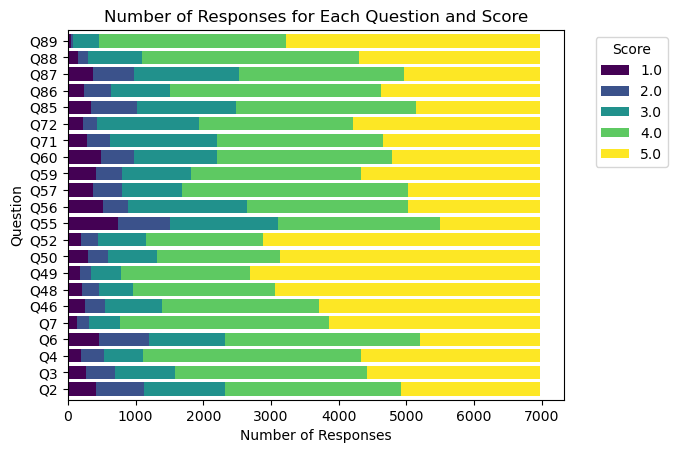

In [78]:
# Create an empty dictionary 
count_dict = {}

# Iterate through questions in the DataFrame
for q in correlation_no_dummies.columns:
# Count the occurrences of each score for the current question
    score_counts = correlation_no_dummies[q].value_counts()

# Store the score counts for the current question in the main dictionary
    count_dict[q] = score_counts

# Convert the dictionary to a DataFrame 
count_df = pd.DataFrame(count_dict).T

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
count_df.plot(kind='barh', stacked=True, colormap='viridis', width=0.8)
plt.xlabel('Number of Responses')
plt.ylabel('Question')
plt.title('Number of Responses for Each Question and Score')
plt.legend(title='Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



<Axes: >

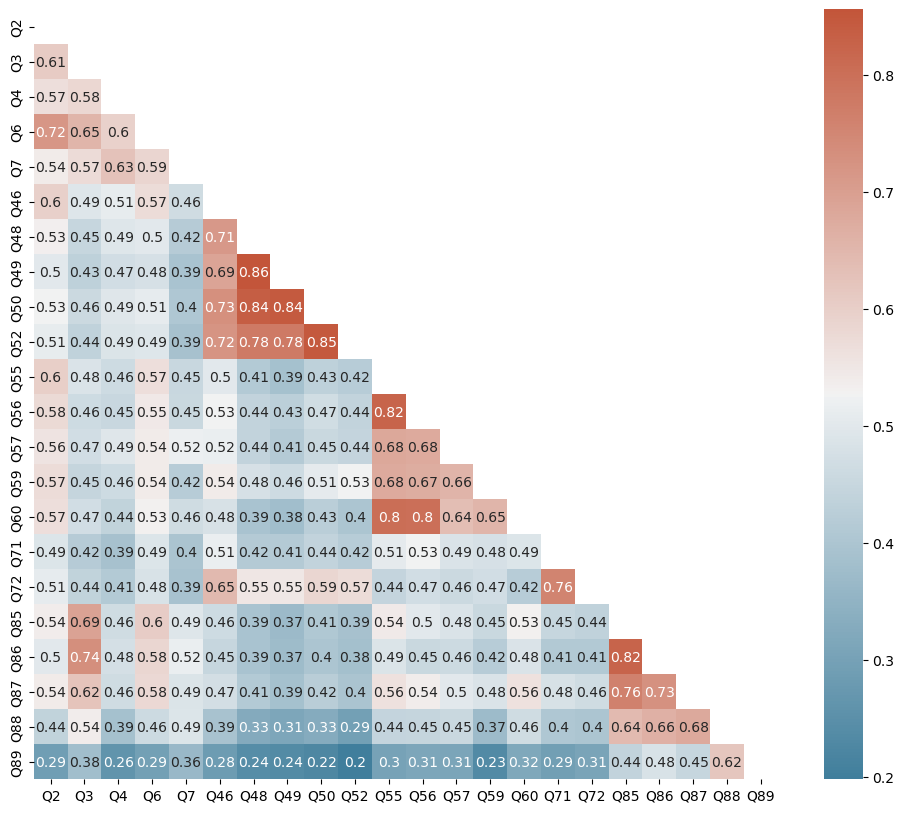

In [79]:

#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
            # 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
             #'LSTAT', 'MEDV']
#
# Correlation between different variables
#
corr = correlation_no_dummies.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


In [80]:
corr_unstack_df=corr.unstack().reset_index()

In [ ]:
corr_unstack_df.columns=['level_0', 'level_1', 'correlation']
corr_unstack_df.to_csv('corr.csv')
#corr_unstack_df.loc[corr_unstack_df['correlation']>0.8]

In [81]:
# Drop highly correlated columns that are more than .8
correlation_no_dummies = correlation_no_dummies.drop(['Q86', 'Q56', 'Q60', 'Q49', 'Q50', 'Q52'], axis=1)
correlation_no_dummies

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q55,Q57,Q59,Q71,Q72,Q85,Q87,Q88,Q89
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,4.0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,5.0
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,5.0,2.0,5.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,4.0,5.0
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0


In [82]:
#Removed highly correlated questions:'Q86', 'Q56', 'Q60', 'Q49', 'Q50', 'Q52'
correlation_no_dummies

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q55,Q57,Q59,Q71,Q72,Q85,Q87,Q88,Q89
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,4.0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,5.0
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,5.0,2.0,5.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,4.0,5.0
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0


<Axes: >

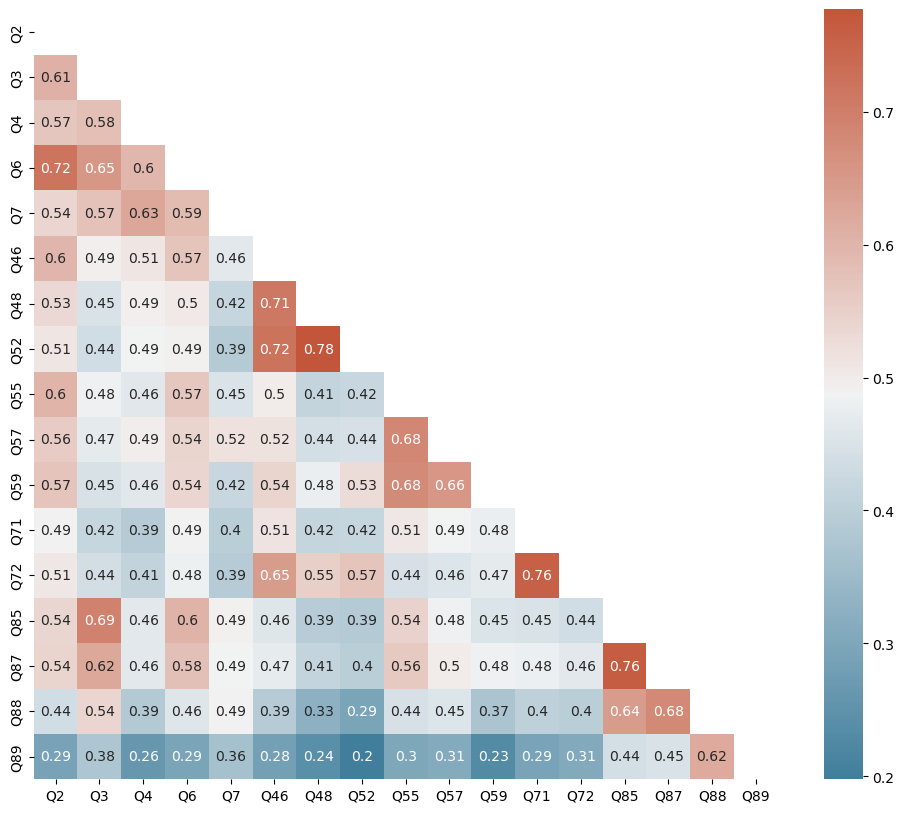

In [27]:
# Correlation between different variables
#
corr2 = correlation_no_dummies.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr2, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr2, annot=True, mask = mask, cmap=cmap)

# Combine all of the variables into a single dataframe

In [28]:
# New correlation with dummies 
result_df = pd.concat([correlation_no_dummies, extracted_columns_df], axis=1)
result_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q52,Q55,Q57,...,Super,-10YearsFed,11-20YearsFed,+20Fed,Male,Female,Mil,NoMil,dbl_needs_not_met,Outcome
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,2.0,3.0,4.0,...,1,0,1,0,1,0,0,1,0,0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,2.0,1.0,...,0,0,1,0,0,1,0,1,0,0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,1,0,0,1,0,1,0,0,0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,2.0,2.0,...,0,1,0,0,0,1,1,0,1,1
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,1,0,0,1,0,0,1,0,0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,...,0,1,0,0,0,1,0,1,1,1
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,...,0,1,0,0,0,1,0,1,0,0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0,1,0,0,0,1,0,1,0,0


In [29]:
column_list = result_df.columns
column_list

Index(['Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q46', 'Q48', 'Q52', 'Q55', 'Q57', 'Q59',
       'Q71', 'Q72', 'Q85', 'Q87', 'Q88', 'Q89', 'AA', 'White', 'Asian',
       'Other', 'HispY', 'HispN', 'DisY', 'DisN', 'Under40', 'Over40',
       'NonSuper', 'Super', '-10YearsFed', '11-20YearsFed', '+20Fed', 'Male',
       'Female', 'Mil', 'NoMil', 'dbl_needs_not_met', 'Outcome'],
      dtype='object')

In [30]:
# Define features set
X = result_df.copy()
X.drop("Outcome", axis=1, inplace=True)
X.head()

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q52,Q55,Q57,...,NonSuper,Super,-10YearsFed,11-20YearsFed,+20Fed,Male,Female,Mil,NoMil,dbl_needs_not_met
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,2.0,3.0,4.0,...,0,1,0,1,0,1,0,0,1,0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,2.0,1.0,...,1,0,0,1,0,0,1,0,1,0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,1,0,0,1,0,1,0,0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,2.0,2.0,...,1,0,1,0,0,0,1,1,0,1
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,...,1,0,1,0,0,1,0,0,1,0


In [31]:
y = result_df["Outcome"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [32]:
print(X.shape, y.shape)


(6978, 37) (6978, 1)


# Split the data into X and y and then into testing and training sets.

In [33]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Part 1:Fit a logistic regression classifier.

In [34]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

# Create the predicted values for the training and testing data.

In [35]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

# Print a confusion matrix for the training data.

In [36]:
# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[3182  300]
 [ 964  787]]


# Print a confusion matrix for the testing data.

In [37]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[1118  120]
 [ 284  223]]


# Print the training and testing classification report.

In [38]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)
#not good at predicting no's, only yes's

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3482
           1       0.72      0.45      0.55      1751

    accuracy                           0.76      5233
   macro avg       0.75      0.68      0.69      5233
weighted avg       0.75      0.76      0.74      5233



In [39]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)
#not good at predicting no's, only yes's

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1238
           1       0.65      0.44      0.52       507

    accuracy                           0.77      1745
   macro avg       0.72      0.67      0.69      1745
weighted avg       0.75      0.77      0.75      1745



# Part 2:Fit a second logistic regression model with the penalty parameter set to ‘l2’.

In [40]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(penalty='l2',random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [41]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [43]:
# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[3182  300]
 [ 964  787]]


# Print a confusion matrix for the testing data.

In [44]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[1118  120]
 [ 284  223]]


# Print the testing classification report.

In [45]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)
#no difference with l2

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1238
           1       0.65      0.44      0.52       507

    accuracy                           0.77      1745
   macro avg       0.72      0.67      0.69      1745
weighted avg       0.75      0.77      0.75      1745



In [46]:
scaler = StandardScaler()

In [47]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [48]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Random Forest Model

In [49]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [50]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making Predictions Using the Random Forest Model

In [51]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Model Evaluation

In [52]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
cm

array([[1079,  159],
       [ 273,  234]], dtype=int64)

In [53]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1079,159
Actual 1,273,234


Accuracy Score : 0.7524355300859599
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1238
           1       0.60      0.46      0.52       507

    accuracy                           0.75      1745
   macro avg       0.70      0.67      0.68      1745
weighted avg       0.74      0.75      0.74      1745



In [55]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.07387269268607492, 'Q6'),
 (0.06793446126956516, 'Q85'),
 (0.06303656958113613, 'Q87'),
 (0.05577974819802338, 'Q55'),
 (0.050954349715529666, 'Q2'),
 (0.0474571909174895, 'Q59'),
 (0.04238166032140192, 'Q3'),
 (0.04092123299669128, 'Q71'),
 (0.04054149838986535, 'Q57'),
 (0.03968422573732281, 'Q52'),
 (0.03955396735707824, 'Q46'),
 (0.03591457259825508, 'Q48'),
 (0.033779179639427934, 'Q72'),
 (0.03281081009293512, 'Q4'),
 (0.029316313602411433, 'Q88'),
 (0.026807879771364798, 'Q7'),
 (0.025470565130552583, 'Q89'),
 (0.017622177171642304, '11-20YearsFed'),
 (0.016709600781762486, 'Male'),
 (0.01664825909403078, 'Female'),
 (0.016463009379717945, '+20Fed'),
 (0.01553859846832152, '-10YearsFed'),
 (0.015085567840982044, 'White'),
 (0.013499433044659169, 'NonSuper'),
 (0.013477098479922544, 'Super'),
 (0.01338699095910707, 'Mil'),
 (0.013358310261802897, 'NoMil'),
 (0.012687021322500562, 'AA'),
 (0.012088556198488275, 'DisY'),
 (0.011933232129488183, 'Under40'),
 (0.01184524183164203

# Feature Importance

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

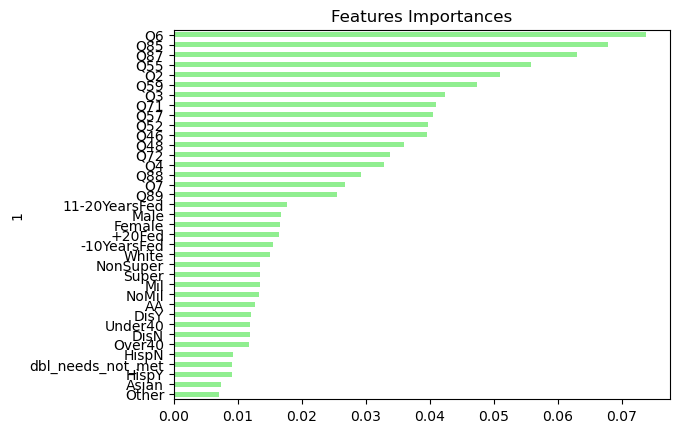

In [56]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Department of Commerce

In [83]:
import os
dir_path = os.getcwd()
dir_path +="\\result2_df.csv"
# Define the correct path to the CSV file
dir_path 

# Read the CSV file into a DataFrame
result2_df = pd.read_csv(dir_path)


In [84]:
# Define features set
X = result2_df.copy()
X.drop("Outcome", axis=1, inplace=True)
X.head()

,Unnamed: 0,Q2,Q3,Q4,Q6,Q7,Q48,Q49,Q52,Q86,...,NonSuper,Super,-10YearsFed,11-20YearsFed,+20Fed,Male,Female,Mil,NoMil,dbl_needs_not_met
0,1,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,1,0,0,1,0,1,0,1,0,0
1,2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,1,0,0,1,1,0,0,1,0
2,3,2.0,3.0,3.0,2.0,4.0,3.0,4.0,5.0,2.0,...,1,0,0,0,1,0,1,0,1,0
3,4,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,0,1,0,0,1,1,0,0,1,0
4,5,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,0,1,0,0,1,1,0,0,1,0


In [85]:
y = result2_df["Outcome"].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [86]:
print(X.shape, y.shape)

(19913, 33) (19913, 1)


In [87]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [88]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[2764  108]
 [ 832  279]]


In [89]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)
#no difference with l2

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      2872
           1       0.72      0.25      0.37      1111

    accuracy                           0.76      3983
   macro avg       0.74      0.61      0.61      3983
weighted avg       0.76      0.76      0.72      3983



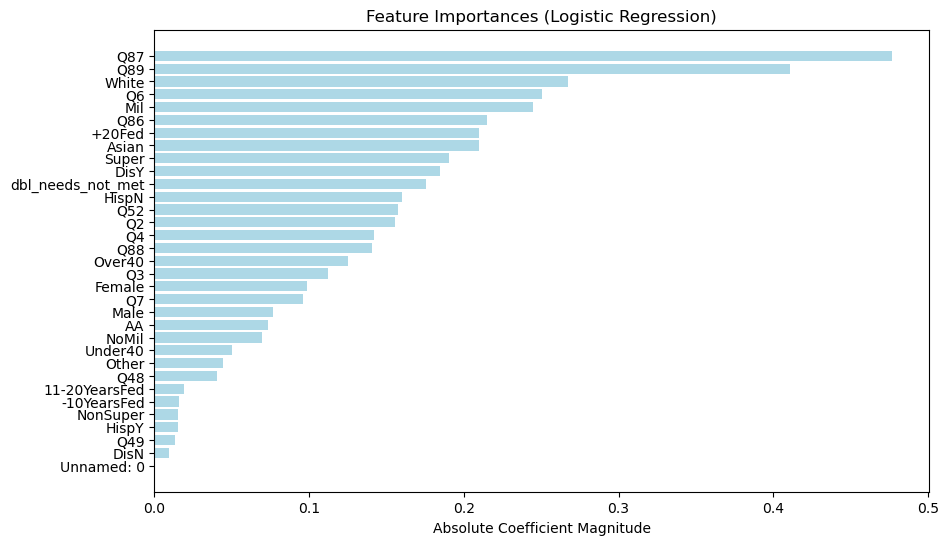

In [90]:

# Define features set
X = result2_df.copy()
X.drop("Outcome", axis=1, inplace=True)

# Define target variable
y = result2_df["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Extract coefficients and feature names
coefficients = logistic_regression_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
importances_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficients
importances_df['Absolute Coefficient'] = importances_df['Coefficient'].abs()
importances_sorted = importances_df.sort_values(by='Absolute Coefficient')

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_sorted['Feature'], importances_sorted['Absolute Coefficient'], color='lightblue')
plt.xlabel('Absolute Coefficient Magnitude')
plt.title('Feature Importances (Logistic Regression)')
plt.show()


# Extra Exploration

In [ ]:
dol_df.describe()

In [ ]:
dol_df['Q1'].value_counts()

In [ ]:
dol_df["DSEX"].value_counts()

In [ ]:
dol_df["DHISP"].value_counts()

In [ ]:
dol_df["DDIS"].value_counts()

In [ ]:
dol_df["DAGEGRP"].value_counts()